In [64]:
#packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [65]:
#set object of both datasets
earlyYears = pd.read_csv('motor_data11-14lats.csv')
laterYears = pd.read_csv('motor_data14-2018.csv')

In [66]:
# Metadata, Need the metadata.csv
# Can delete not important
metadata = pd.read_csv('Metadata.csv')
metadata.head()

,S .N,Name,Type,Domain / Levels,Description / representation
0,1,Sex,categorical,"0, 1, 2","0 = legal entity, 1 = male,2 = female"
1,2,Season,categorical,"autumn, winter, spring, summer",Beginning of contract.
2,3,Insurance type,categorical,"1201, 1202, 1204","1201 = private, 1202 = commercial, 1204 = moto..."
3,4,Type vehicle,categorical,"pick-up, truck, bus, ...",Type of vehicle grouped into six categories.
4,5,Usage,categorical,"fare paying passengers, taxi, general cartage,...",A usual usage of the vehicle grouped into six ...


In [67]:
print(f'Early Years Dataset Features: {earlyYears.columns}')
print(f'Later Years Dataset Features: {laterYears.columns}')


Early Years Dataset Features: Index(['SEX', 'INSR_BEGIN', 'INSR_END', 'EFFECTIVE_YR', 'INSR_TYPE',
       'INSURED_VALUE', 'PREMIUM', 'OBJECT_ID', 'PROD_YEAR', 'SEATS_NUM',
       'CARRYING_CAPACITY', 'TYPE_VEHICLE', 'CCM_TON', 'MAKE', 'USAGE',
       'CLAIM_PAID'],
      dtype='object')
Later Years Dataset Features: Index(['SEX', 'INSR_BEGIN', 'INSR_END', 'EFFECTIVE_YR', 'INSR_TYPE',
       'INSURED_VALUE', 'PREMIUM', 'OBJECT_ID', 'PROD_YEAR', 'SEATS_NUM',
       'CARRYING_CAPACITY', 'TYPE_VEHICLE', 'CCM_TON', 'MAKE', 'USAGE',
       'CLAIM_PAID'],
      dtype='object')


In [68]:
combined = pd.concat([earlyYears, laterYears], join = 'outer')
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 802036 entries, 0 to 508498
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SEX                802036 non-null  int64  
 1   INSR_BEGIN         802036 non-null  object 
 2   INSR_END           802036 non-null  object 
 3   EFFECTIVE_YR       802032 non-null  object 
 4   INSR_TYPE          802036 non-null  int64  
 5   INSURED_VALUE      802036 non-null  float64
 6   PREMIUM            802015 non-null  float64
 7   OBJECT_ID          802036 non-null  int64  
 8   PROD_YEAR          801867 non-null  float64
 9   SEATS_NUM          801801 non-null  float64
 10  CARRYING_CAPACITY  603837 non-null  float64
 11  TYPE_VEHICLE       802036 non-null  object 
 12  CCM_TON            802028 non-null  float64
 13  MAKE               802031 non-null  object 
 14  USAGE              802036 non-null  object 
 15  CLAIM_PAID         60145 non-null   float64
dtypes: floa

In [69]:
combined.sample(10)

,SEX,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID
75084,0,01-JUL-13,30-JUN-14,11,1202,877081.98,8212.80,5000094277,2008.0,4.0,6.0,Pick-up,2986.0,TOYOTA,Own Goods,NaN
229848,1,04-MAR-15,02-SEP-15,14,1202,1500000.00,10720.28,5000585777,2013.0,1.0,132.0,Truck,9726.0,SINO HOWO,General Cartage,18457.5
161814,0,19-MAR-14,18-MAR-15,11,1202,403607.56,7307.23,5000228713,2005.0,4.0,10.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
199350,0,01-JAN-13,31-DEC-13,12,1201,105203.00,1803.00,5000279382,2005.0,4.0,NaN,Automobile,1299.0,TOYOTA,Private,NaN
22198,0,09-AUG-16,08-AUG-17,12,1201,0.00,898.88,5000032939,2010.0,4.0,NaN,Automobile,1296.0,TOYOTA,Private,NaN
449632,0,22-FEB-17,21-FEB-18,17,1201,0.00,216.20,5001031854,2016.0,1.0,NaN,Motor-cycle,150.0,LIFAN,Private,NaN
321745,1,24-MAR-15,23-MAR-16,15,1202,0.00,354.60,5000731770,2014.0,3.0,0.0,Motor-cycle,200.0,TVS,Fare Paying Passengers,NaN
370577,2,26-DEC-15,25-DEC-16,15,1201,280000.00,659.30,5000825211,1997.0,4.0,NaN,Automobile,1296.0,TOYOTA,Private,NaN
288926,0,11-MAR-17,10-MAR-18,12,1202,0.00,1178.08,5000680262,2011.0,4.0,7.0,Pick-up,3153.0,TOYOTA,Own Goods,NaN
246451,1,14-MAY-17,13-MAY-18,14,1202,950000.00,13815.80,5000601985,2014.0,2.0,28.0,Truck,4570.0,ISUZU,Own Goods,77657.8


In [70]:
# Show the null values
combined.isnull().sum()
# CLAIM_PAID null can be filled with 0's
# Carrying Capacity might need to be dropped

SEX                       0
INSR_BEGIN                0
INSR_END                  0
EFFECTIVE_YR              4
INSR_TYPE                 0
INSURED_VALUE             0
PREMIUM                  21
OBJECT_ID                 0
PROD_YEAR               169
SEATS_NUM               235
CARRYING_CAPACITY    198199
TYPE_VEHICLE              0
CCM_TON                   8
MAKE                      5
USAGE                     0
CLAIM_PAID           741891
dtype: int64

In [71]:
#replacing nan values with 0 to use
combined['CLAIM_PAID'] = combined['CLAIM_PAID'].replace({np.nan : 0})
#changing values using regex operators to be used in ML model
combined['EFFECTIVE_YR'] = combined['EFFECTIVE_YR'].replace(['/', '-', 'B', 'S', 'R', 'EN', 'MO', 'IN', 'SS', 'RS', 'SR', 'EA', 'BS', '4A', '1A', '1K', '1M', '2A', '1C', '6A', '5A', '3A', '5C', '7A'], np.nan, regex=True)
combined.sample(10)


,SEX,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID
188492,0,01-JAN-17,31-DEC-17,12,1202,0.0,1248.920,5000413938,2011.0,5.0,5.0,Pick-up,2896.00,TOYOTA,Own Goods,0.0
320300,1,21-APR-15,20-APR-16,15,1202,0.0,354.600,5000741401,2013.0,3.0,3.0,Motor-cycle,199.26,BAJAJI,Taxi,0.0
25923,0,10-JUL-11,09-JUL-12,06,1202,1252300.0,9030.603,5000032841,2007.0,1.0,152.0,Truck,11149.00,HYUNDAI,Own Goods,0.0
37296,0,01-JUL-14,30-JUN-15,99,1202,147732.0,2495.620,5000042571,1996.0,4.0,7.0,Pick-up,2779.00,TOYOTA,Own Goods,0.0
263838,1,25-JUN-13,24-JUN-14,13,1202,0.0,4515.150,5000486813,2010.0,2.0,0.0,Truck,4570.00,ISUZU,General Cartage,0.0
111352,1,03-JAN-18,02-JAN-19,15,1202,0.0,4514.500,5000190773,2010.0,2.0,0.0,Truck,8226.00,ISUZU,General Cartage,0.0
61092,0,08-JUL-15,07-JUL-16,13,1202,600000.0,6467.400,5000087869,2006.0,0.0,220.8,Trailers and semitrailers,0.00,MESFIN,General Cartage,0.0
472913,0,02-JUL-17,01-JUL-18,17,1202,0.0,443.900,5001096102,2016.0,0.0,200.0,Trailers and semitrailers,0.00,BARTOLETI,Own Goods,0.0
132199,0,01-JUL-17,30-JUN-18,12,1202,1000000.0,3708.290,5000250192,2000.0,1.0,1.0,Special construction,14886.00,CAT,Own Goods,0.0
488071,1,26-DEC-17,25-JAN-18,22,1201,400000.0,386.170,5001185721,2004.0,4.0,NaN,Automobile,997.00,TOYOTA,Private,0.0


In [72]:
combined = combined.dropna()
combined.isnull().sum()

SEX                  0
INSR_BEGIN           0
INSR_END             0
EFFECTIVE_YR         0
INSR_TYPE            0
INSURED_VALUE        0
PREMIUM              0
OBJECT_ID            0
PROD_YEAR            0
SEATS_NUM            0
CARRYING_CAPACITY    0
TYPE_VEHICLE         0
CCM_TON              0
MAKE                 0
USAGE                0
CLAIM_PAID           0
dtype: int64

In [73]:
print(f"Unique Values in INSR_TYPE: \n {combined['INSR_TYPE'].unique()}")
print(f"Unique Values in TYPE_VEHICLE: \n{combined['TYPE_VEHICLE'].unique()}")
print(f"Unique Values in MAKE: \n{combined['MAKE'].unique()}")
print(f"Unique Values in USAGE: \n{combined['USAGE'].unique()}")


Unique Values in INSR_TYPE: 
 [1202 1201 1204]
Unique Values in TYPE_VEHICLE: 
['Pick-up' 'Truck' 'Bus' 'Tanker' 'Trailers and semitrailers' 'Automobile'
 'Motor-cycle' 'Tractor' 'Station Wagones' 'Special construction'
 'Trade plates']
Unique Values in MAKE: 
['NISSAN' 'TOYOTA' 'IVECO' 'MITSUBISHI' 'FIAT' 'MARU' 'ISUZU' 'MERCEDES'
 'YAMAHA' 'MESFIN' 'CALABRASE' 'DAF' 'FARID' 'TRAILER' 'SINO' 'ISUSU'
 'HOWO' 'HIGHER' 'ZZ' 'ISUZU FVR' 'FORD' 'PEUGEOT' 'TOMSON' 'MERCEEDES'
 'DAEWOO' 'VIBERTI' 'CALABRESE' 'ROZA' 'JIEFANG' 'RENAULT' 'CRANE'
 'TURBO BUS' 'BISHOFTU' 'SCANIA' 'TRAKKER' 'SCHMITZ' 'NATFA' 'ROLFO'
 'INTERNATIONAL USE' 'MAZDA' 'NEW HOLLAND' 'NEW HOLAND' 'TURBO' 'MACK'
 'MTE' 'ORAL' 'DUNGFING' 'SUZUKI' 'HYUNDAI' 'NAMI' 'NISSAN UD' 'VOLVO'
 'HIGER BUS' 'AEOLUS' 'TATA' '330-30 TRA' 'EU. TRAILER' 'HINO' 'VERYCA'
 'AMBULANCE' 'ADGE' 'LOWBED' 'LADA' 'CHEVROLET' 'MERCEEDICE' 'CACCIAMALLI'
 'DAYUN' 'BELARUS' 'VOLKS WAGON' 'RANDON' 'GMC' 'CORDES'
 'HIGH BED TRAILER' 'KIA' '330-30 TRAILER'

In [74]:
# This way of encoding may introduce issues such as overfitting

combined = pd.get_dummies(combined, columns=['INSR_TYPE', 'TYPE_VEHICLE', 'MAKE', 'USAGE'])
combined['EFFECTIVE_YR'] = combined['EFFECTIVE_YR'].astype(int)
object_columns = combined.select_dtypes(include=['object'])
print(object_columns.columns)

Index(['INSR_BEGIN', 'INSR_END'], dtype='object')


In [75]:
from sklearn.model_selection import train_test_split, GridSearchCV
df = combined.drop(['CARRYING_CAPACITY', 'INSR_BEGIN', 'INSR_END', 'OBJECT_ID'], axis=1)

X = df.drop('PREMIUM', axis=1)
y = df['PREMIUM']
X_train, X_test, y_train, y_test,  = train_test_split(X, y, test_size=0.2 , random_state=100)

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
def get_scores(selected_model):


    # Assuming 'model' is your trained regression model and 'X_test', 'y_test' are your test data

    # Make predictions
    y_pred = selected_model.predict(X_test)

    # Calculate MAE, MSE, R², and RMSE
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE from MSE

    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"R-squared (R²): {r2}")
    print(f"RMSE: {rmse}")


In [77]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import pandas as pd



model = LinearRegression()

model.fit(X_train, y_train)

model.predict(X_test)


array([22307.21439062,   759.38412067,  5026.90620635, ...,
         161.0144874 , 11186.44144096,   682.2885074 ])

In [78]:
get_scores(model)

MAE: 3874.589957978106
MSE: 48654280.5642557
R-squared (R²): 0.6208349248787273
RMSE: 6975.262042694575


In [79]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Creating and training the Random Forest model
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)




RandomForestRegressor(random_state=42)

In [80]:
get_scores(forest_model)

MAE: 1738.196554049574
MSE: 20872834.093046494
R-squared (R²): 0.8373370314985582
RMSE: 4568.679688164459


In [81]:
#lets also now test a decision tree
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Creating and training the decision tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)



DecisionTreeRegressor(random_state=42)

In [82]:
get_scores(tree_model)

MAE: 1855.5909456309637
MSE: 25109428.965159766
R-squared (R²): 0.8043210502875779
RMSE: 5010.9309479536605


c:\Users\seans\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<Axes: title={'center': 'Prediction Error for Regression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

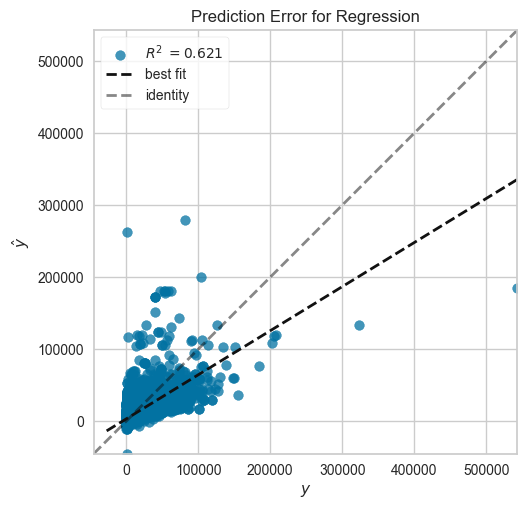

In [90]:
from yellowbrick.regressor import PredictionError
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)


visualizer = PredictionError(model, title="Prediction Error for Regression", xlabel="Predicted Value", ylabel="True Value")
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show(outpath="Regression_prediction_error_visualization.png") 



c:\Users\seans\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

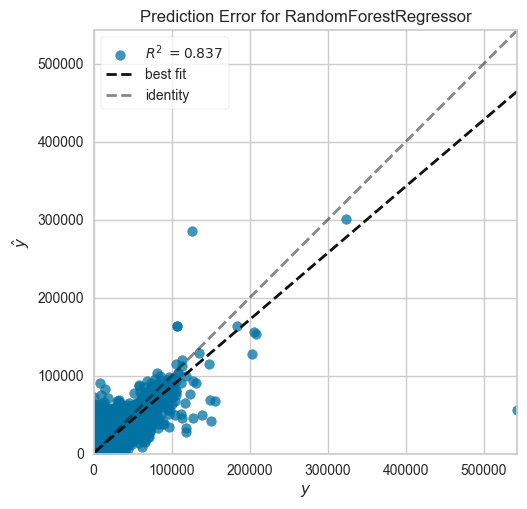

In [93]:
from yellowbrick.regressor import PredictionError
from sklearn.metrics import r2_score

y_pred = forest_model.predict(X_test)

r2 = r2_score(y_test, y_pred)


visualizer = PredictionError(forest_model, title="Prediction Error for RandomForestRegressor", xlabel="Predicted Value", ylabel="True Value")
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show(outpath="Forest_prediction_error_visualization.png") 


c:\Users\seans\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


<Axes: title={'center': 'Prediction Error for Regression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

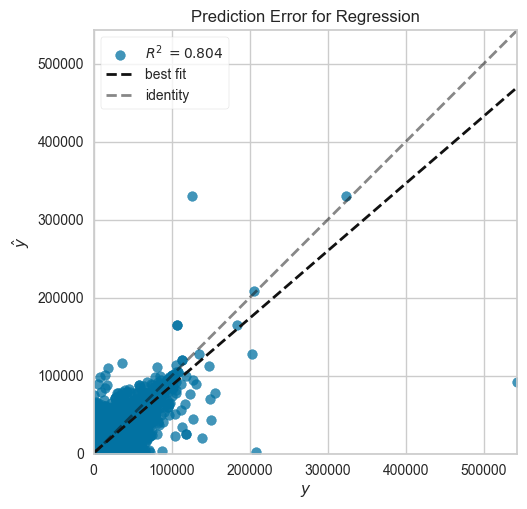

In [92]:
y_pred = tree_model.predict(X_test)

r2 = r2_score(y_test, y_pred)


visualizer = PredictionError(tree_model, title="Prediction Error for Regression", xlabel="Predicted Value", ylabel="True Value")
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show(outpath="Tree_prediction_error_visualization.png") 

